In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

df1 = pd.read_csv('Resultados_1980_2024_.csv', sep=";", nrows=21)

df1

,X,Y,Yp,Years
0,0,5,0.0210,2004-2024
1,1,38,0.1597,2004-2024
2,2,57,0.2395,2004-2024
3,3,26,0.1092,2004-2024
4,4,22,0.0924,2004-2024
5,5,21,0.0882,2004-2024
6,6,14,0.0588,2004-2024
7,7,9,0.0378,2004-2024
8,8,10,0.0420,2004-2024
9,9,5,0.0210,2004-2024


In [13]:
df2 = pd.read_csv('Resultados_1980_2024_.csv', sep=";", skiprows=21)

df2.rename(columns={'20': 'X'}, inplace=True)
df2.rename(columns={'0.1': 'Yp'}, inplace=True)

df2

,X,0,Yp,2004-2024
0,0,1,0.0044,1980-2000
1,1,32,0.1404,1980-2000
2,2,121,0.5307,1980-2000
3,3,25,0.1096,1980-2000
4,4,17,0.0746,1980-2000
5,5,9,0.0395,1980-2000
6,6,9,0.0395,1980-2000
7,7,2,0.0088,1980-2000
8,8,4,0.0175,1980-2000
9,9,3,0.0132,1980-2000


In [10]:
df_mod = pd.DataFrame({'x': df1.X, 'y': df1.Yp})

df_mod['x_group'] = pd.cut(df_mod['x'], bins=[-1, 0, 2, 5, 10, 20],
                           labels=["0", "1–2", "3–5", "6–10", ">10"])

df_grouped = df_mod.groupby('x_group', sort=False).sum().reset_index()

x = df_grouped['x_group']
y = df_grouped['y']


df_mod = pd.DataFrame({'x': df2.X, 'y': df2.Yp})

df_mod['x_group'] = pd.cut(df_mod['x'], bins=[-1, 0, 2, 5, 10, 20],
                           labels=["0", "1–2", "3–5", "6–10", ">10"])

df_grouped = df_mod.groupby('x_group', sort=False).sum().reset_index()

x = df_grouped['x_group']
y2 = df_grouped['y']

<ipython-input-10-1df458f68f6d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_mod.groupby('x_group', sort=False).sum().reset_index()
<ipython-input-10-1df458f68f6d>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_mod.groupby('x_group', sort=False).sum().reset_index()


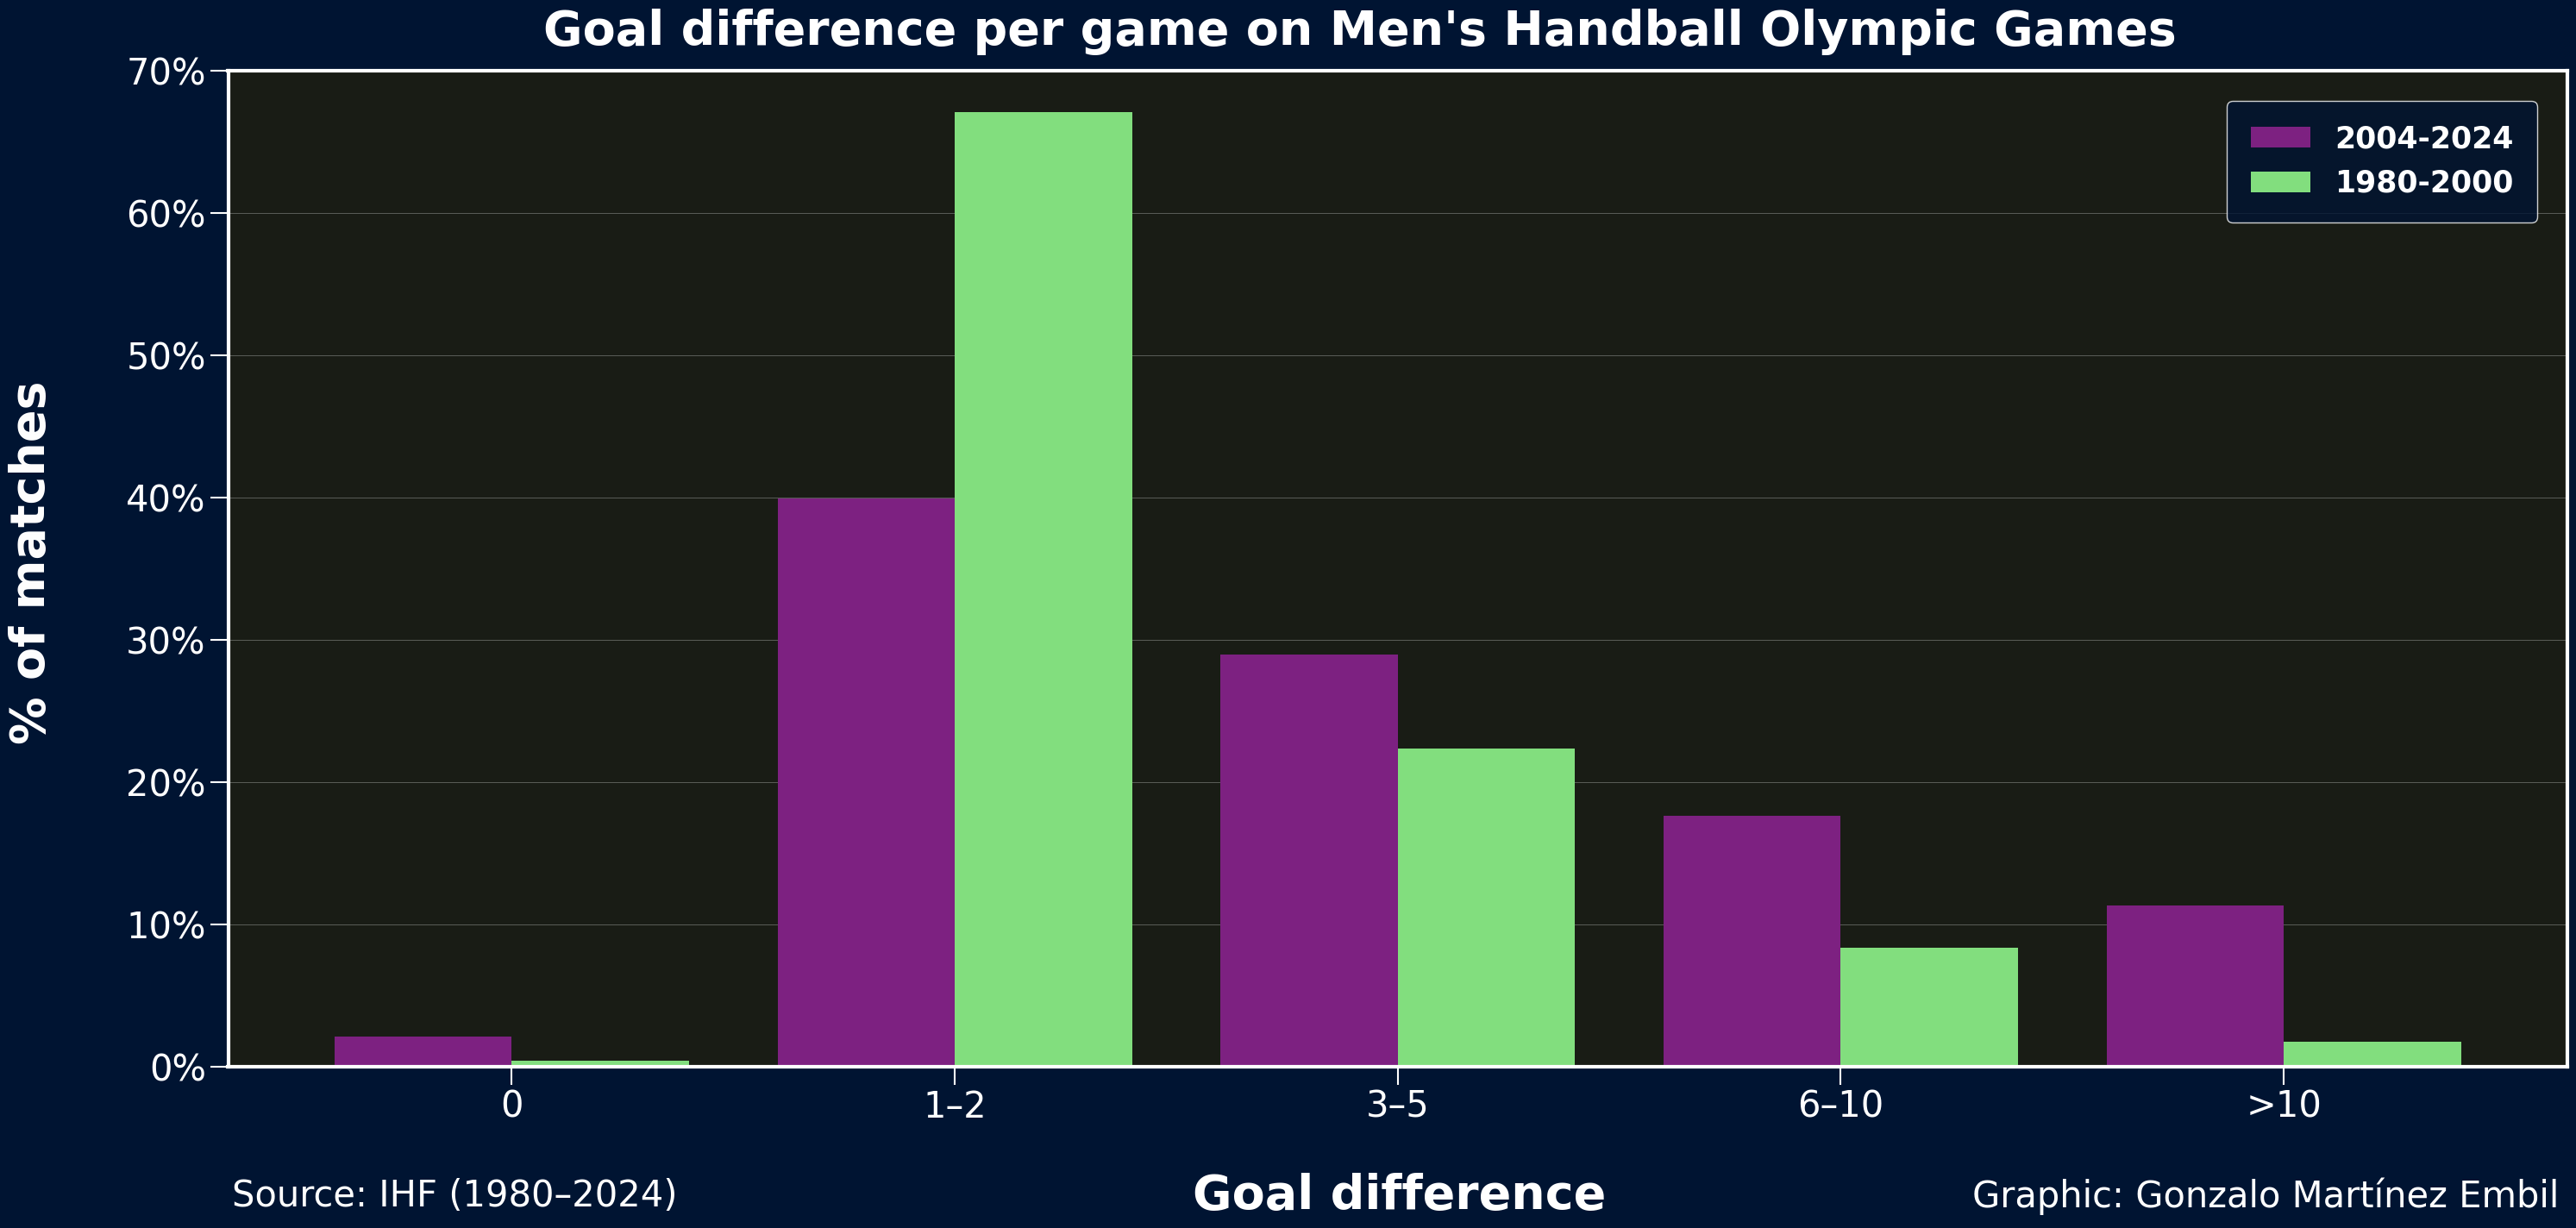

In [14]:
x_pos = np.arange(len(x))
y_percent = [valor * 100 for valor in y]
y2_percent = [valor * 100 for valor in y2]
co = np.arange(len(y_percent))
an = 0.2

# Gráfico
fig, ax = plt.subplots(figsize=(35,15), facecolor='#001432')
ax.set_facecolor('#191c15')

# Grid
ax.grid(axis='y', alpha=0.5, linewidth=0.4, color='white', zorder=0)

# Barras
ax.bar(co - an, y_percent, width=0.4, color='#7d2181', alpha=1, zorder=4)
ax.bar(co + an, y2_percent, width=0.4, color='#82de7e', alpha=1, zorder=4)

# Ejes
ax.set_yticks(np.arange(0, 71, 10))
ax.set_ylim(0, 70)
ax.set_yticklabels([f'{i}%' for i in range(0, 71, 10)], color='white', fontsize=30)
ax.set_xticks(x_pos)
ax.set_xticklabels(x, color='white', fontsize=30)

# Labels
ax.tick_params(colors='white', length=15, width=1.5, which='both')

# Borders
for axis in ['bottom', 'top', 'left', 'right']:
  ax.spines[axis].set_color('white')
  ax.spines[axis].set_linewidth(3)
  ax.spines[axis].set_zorder(5)

# Textos
fig.text(0.5, 0.91, "Goal difference per game on Men's Handball Olympic Games", ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.2, 0.01, 'Source: IHF (1980–2024)', ha='center', va='center', fontsize=30, color='white')
fig.text(0.513, 0.01, 'Goal difference', ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.8, 0.01, 'Graphic: Gonzalo Martínez Embil', ha='center', va='center', fontsize=30, color='white')
fig.text(0.06, 0.5, '% of matches', rotation=90, ha='center', va='center', fontsize=40, color='white', weight='bold')

# Leyenda
legend = ax.legend(['2004-2024', '1980-2000'], borderaxespad=1, loc='upper right', fontsize=25, facecolor='#001432', edgecolor='white', borderpad=0.8)
for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_color("white")
    text.set_fontsize(25)

fig.savefig("Goal difference per game on Men's Handball Olympic Games", dpi=200, bbox_inches='tight', pad_inches=1)
plt.show()

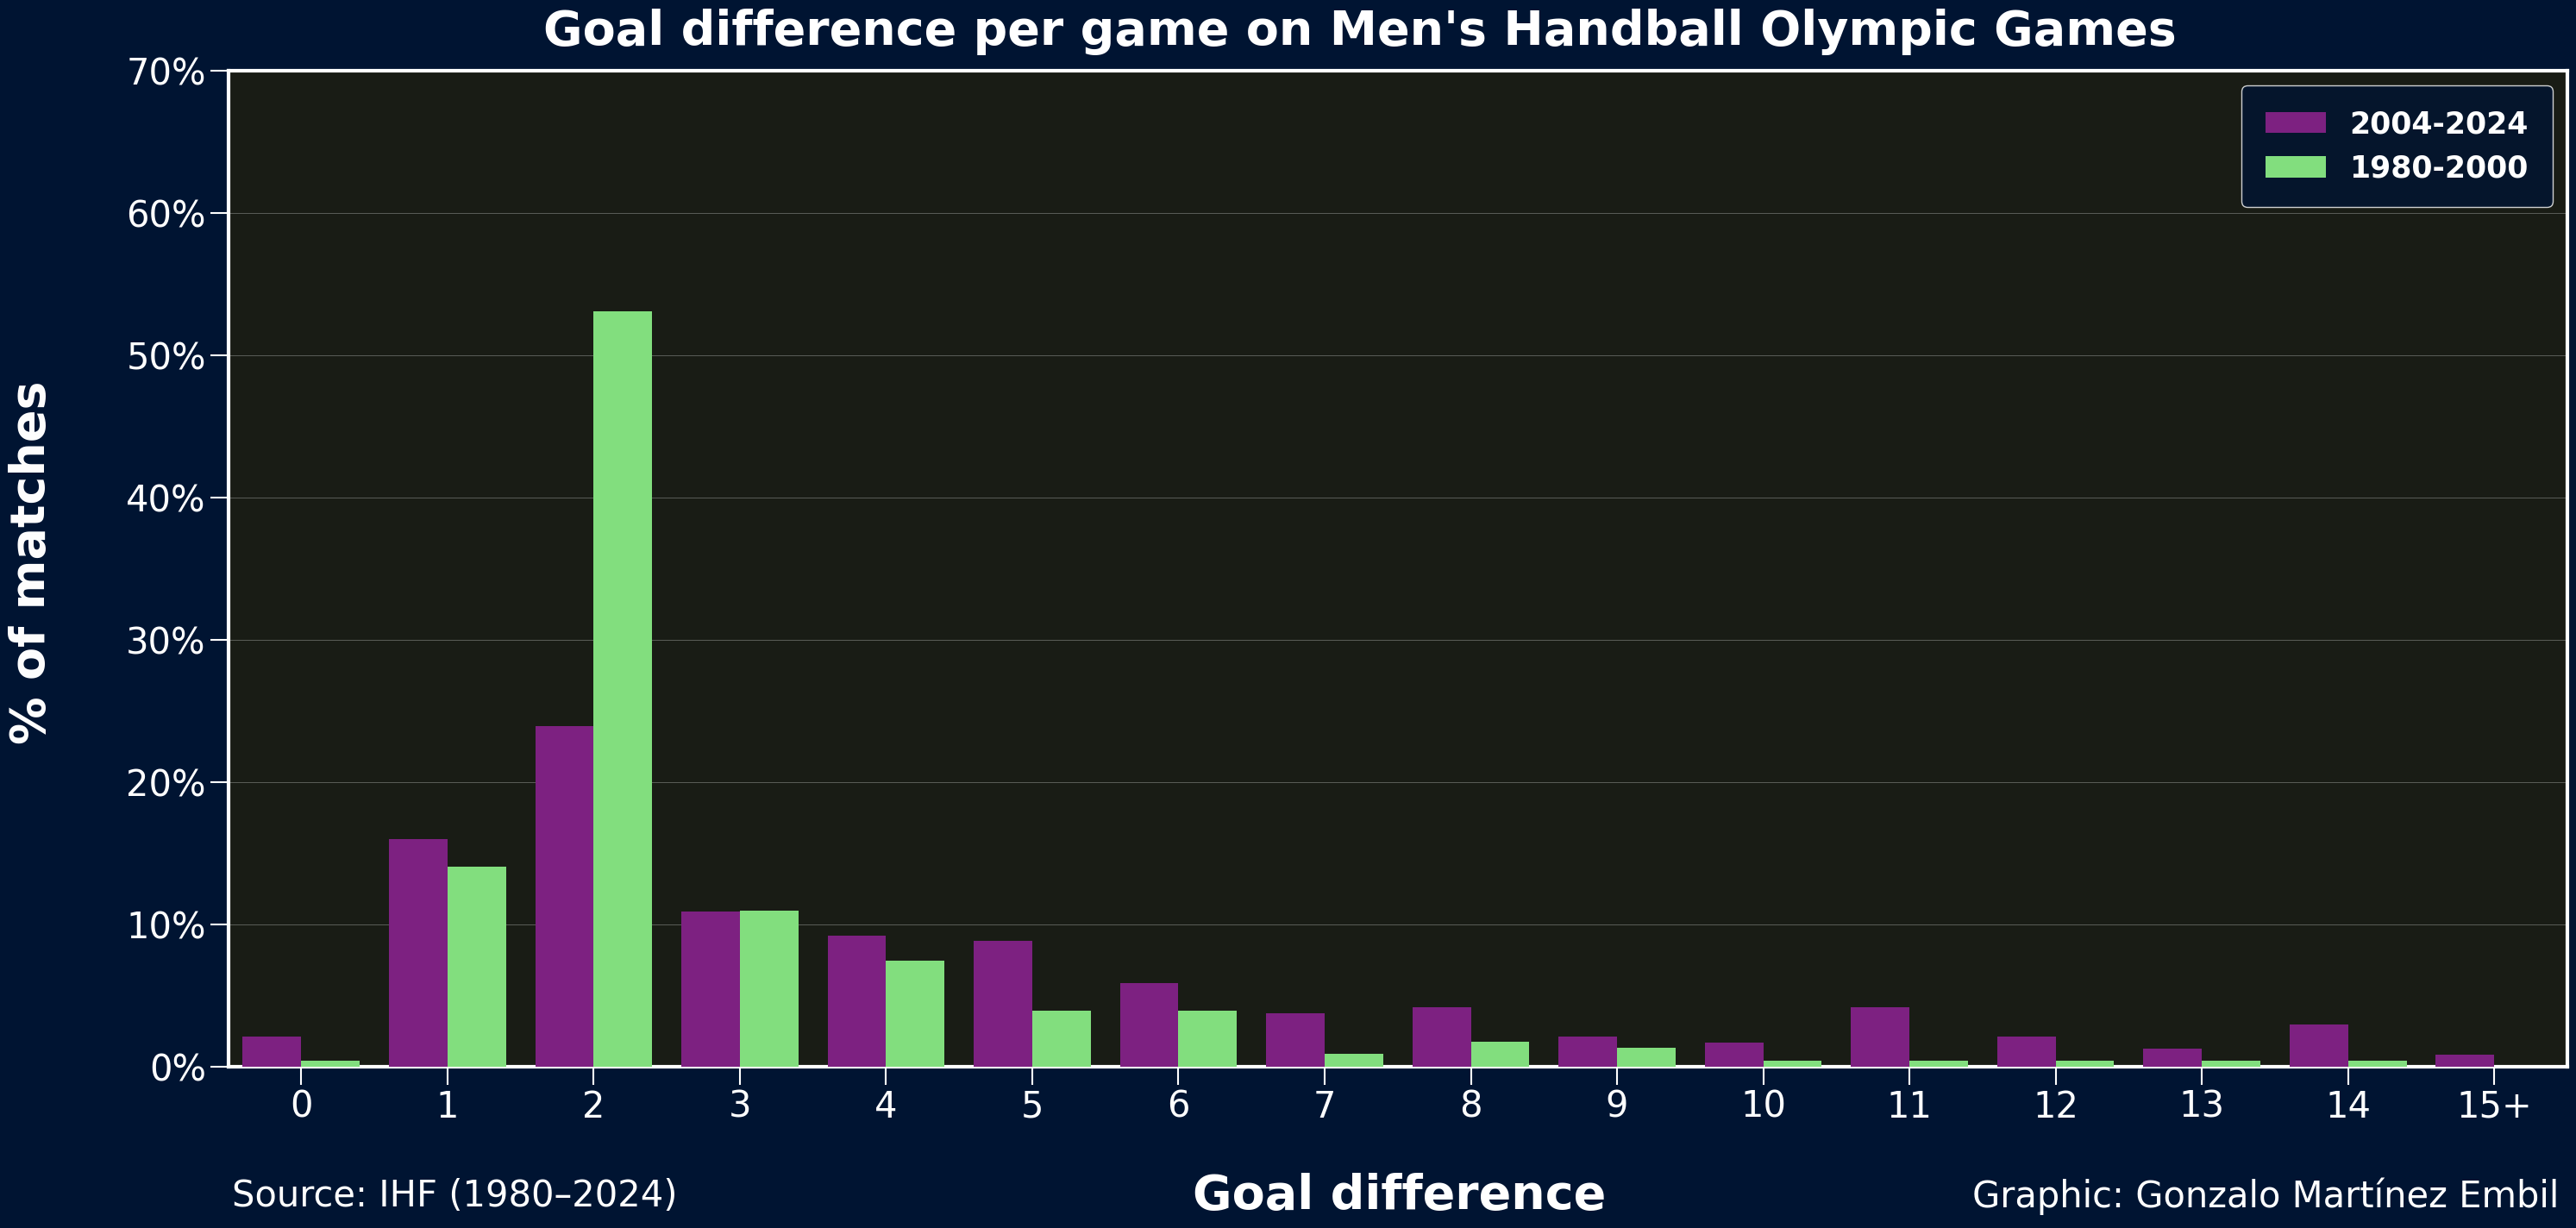

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Agrupar valores de X >= 15 como "15+"
def agrupar_x(x):
    return x if x < 15 else "15+"

# Filtrar y agrupar df1
df1_copy = df1[(df1.X >= 0) & (df1.X <= 20)].copy()
df1_copy['X_mod'] = df1_copy['X'].apply(agrupar_x)
df1_grouped = df1_copy.groupby('X_mod', as_index=False)['Yp'].sum()

# Filtrar y agrupar df2
df2_copy = df2[(df2.X >= 0) & (df2.X <= 20)].copy()
df2_copy['X_mod'] = df2_copy['X'].apply(agrupar_x)
df2_grouped = df2_copy.groupby('X_mod', as_index=False)['Yp'].sum()

# Ordenar etiquetas
def ordenar_clave(val):
    return int(val) if val.isdigit() else 99

df1_grouped['X_mod'] = df1_grouped['X_mod'].astype(str)
df2_grouped['X_mod'] = df2_grouped['X_mod'].astype(str)
df1_grouped = df1_grouped.sort_values(by='X_mod', key=lambda col: col.map(ordenar_clave))
df2_grouped = df2_grouped.sort_values(by='X_mod', key=lambda col: col.map(ordenar_clave))

# Datos para graficar
x_labels = df1_grouped['X_mod'].tolist()
x = np.arange(len(x_labels))
y1 = df1_grouped['Yp'].values * 100
y2 = df2_grouped['Yp'].values * 100
offset = 0.2

# Suavizado
x_smooth = np.linspace(x.min(), x.max(), 300)
spline1 = make_interp_spline(x, y1, k=3)
spline2 = make_interp_spline(x, y2, k=3)
y1_smooth = np.clip(spline1(x_smooth), 0, None)
y2_smooth = np.clip(spline2(x_smooth), 0, None)

# Crear figura
fig, ax = plt.subplots(figsize=(35, 15), facecolor='#001432')
ax.set_facecolor('#191c15')

# Grid
ax.grid(axis='y', alpha=0.5, linewidth=0.4, color='white', zorder=0)

# Barras
ax.bar(x - offset, y1, width=0.4, color='#7d2181', alpha=1, zorder=4)
ax.bar(x + offset, y2, width=0.4, color='#82de7e', alpha=1, zorder=4)

# Ejes
ax.set_xticks(x)
ax.set_xticklabels(x_labels, color='white', fontsize=30)
ax.set_xlim(-0.5, len(x_labels) - 0.5)
ax.set_yticks(np.arange(0, 71, 10))
ax.set_yticklabels([f'{i}%' for i in range(0, 71, 10)], color='white', fontsize=30)
ax.set_ylim(0, 70)
ax.tick_params(colors='white', length=15, width=1.5, which='both')

# Bordes blancos
for axis in ['bottom', 'top', 'left', 'right']:
    ax.spines[axis].set_color('white')
    ax.spines[axis].set_linewidth(3)

# Textos
fig.text(0.5, 0.91, "Goal difference per game on Men's Handball Olympic Games", ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.2, 0.01, 'Source: IHF (1980–2024)', ha='center', va='center', fontsize=30, color='white')
fig.text(0.513, 0.01, 'Goal difference', ha='center', va='center', fontsize=40, color='white', weight='bold')
fig.text(0.8, 0.01, 'Graphic: Gonzalo Martínez Embil', ha='center', va='center', fontsize=30, color='white')
fig.text(0.06, 0.5, '% of matches', rotation=90, ha='center', va='center', fontsize=40, color='white', weight='bold')

# Leyenda
legend = ax.legend(['2004-2024', '1980-2000'], loc='upper right', fontsize=25,
                   facecolor='#001432', edgecolor='white', borderpad=0.8)
for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_color("white")
    text.set_fontsize(25)

# Guardar y mostrar
fig.savefig("Goal difference per game - Combined", dpi=200, bbox_inches='tight', pad_inches=1)
plt.show()
